In [1]:
import numpy as np

In [2]:
a = np.array([1,2,3,4,5])

In [3]:
np.diff(a)

array([1, 1, 1, 1])

In [6]:
expected_diff_price = np.ones((3,6))
diff = list(zip(*expected_diff_price))

In [11]:
expected_diff_price

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [10]:
for i in expected_diff_price:
    print(i)

[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]


In [7]:
diff

[(1.0, 1.0, 1.0),
 (1.0, 1.0, 1.0),
 (1.0, 1.0, 1.0),
 (1.0, 1.0, 1.0),
 (1.0, 1.0, 1.0),
 (1.0, 1.0, 1.0)]

In [13]:
np.arange(5)[::-1]

array([4, 3, 2, 1, 0])

In [14]:
.5* np.tile(np.identity(2),[4,1,1])

array([[[0.5, 0. ],
        [0. , 0.5]],

       [[0.5, 0. ],
        [0. , 0.5]],

       [[0.5, 0. ],
        [0. , 0.5]],

       [[0.5, 0. ],
        [0. , 0.5]]])

In [18]:
np.arange(2,5)/np.arange(2,5) -1

array([0., 0., 0.])

In [19]:
import pandas as pd

In [23]:
pd.DataFrame([[1,2,],[3,4]]).mean().mean()

2.5

In [63]:
a= [[1,2],[2],3,4,5]
b= [[5,4],4,3,2,1]

for i in zip(a,b):
    print(i)

([1, 2], [5, 4])
([2], 4)
(3, 3)
(4, 2)
(5, 1)


In [9]:
np.concatenate(([1, 2], [5, 4]))

array([1, 2, 5, 4])

In [1]:
import numpy as np

In [4]:
np.multiply([1,2],np.arange(2))/3

array([0.        , 0.66666667])

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
a = np.array([[100,2,3,4],[10,3,2,3],[50,3,2,3]])

In [58]:
a_scaled = scaler.fit_transform(a)

In [59]:
a_scaled 

array([[ 1.26750044, -1.41421356,  1.41421356,  1.41421356],
       [-1.1769647 ,  0.70710678, -0.70710678, -0.70710678],
       [-0.09053575,  0.70710678, -0.70710678, -0.70710678]])

In [70]:
import pandas as pd
import numpy as np

In [62]:
np.array([1,2,3])/ np.array([2,3,2])

array([0.5       , 0.66666667, 1.5       ])

In [68]:
np.arange(1,3)

array([1, 2])

In [72]:
a =pd.Series(np.arange(10))

In [80]:
b = a.rolling(3).mean()

In [81]:
b

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

In [88]:
import os

In [89]:

def merge_data(start_date, end_date, symbols):
    dates = pd.date_range(start_date, end_date)
    df = pd.DataFrame(index=dates)

    if 'Gold' not in symbols:
        symbols.insert(0, 'Gold')

    for symbol in symbols:

        if symbol in ['Gold', 'USD'] :
            df_temp = pd.read_csv(get_data_path(symbol), index_col="Date", parse_dates=True, na_values=['nan'])
            df_temp = df_temp.applymap(lambda x : x.replace(',', ''))
            df_temp.columns = [symbol + '_' + col for col in df_temp.columns]  # rename columns
            df = df.join(df_temp)
            continue

        df_temp = pd.read_csv(get_data_path(symbol), index_col="Date", parse_dates=True, na_values=['nan'])
        df_temp.columns = [symbol + '_' + col for col in df_temp.columns]  # rename columns
        df = df.join(df_temp)

    return df

In [90]:

def get_data_path(symbol):
    # Return CSV file path given symbol.
    commodity_dir = '../data/commodities'
    currency_dir = '../data/currencies'

    if symbol in ['AUD', 'CNY', 'EUR', 'GBP', 'HKD', 'JPY', 'USD']:
        path = os.path.join(currency_dir, symbol + '_KRW.csv')
    else:
        path = os.path.join(commodity_dir, symbol + '.csv')

    return path


In [91]:
table = merge_data('2010-01-01', '2021-04-18', symbols=['Gold'])

    # TODO: cleaning or filling missing value
table.dropna(subset=['Gold_Price'], inplace=True)

    # TODO:  select columns to use
gold_price = table['Gold_Price'].astype(float)

In [92]:
gold_price

2010-01-04    1117.7
2010-01-05    1118.1
2010-01-06    1135.9
2010-01-07    1133.1
2010-01-08    1138.2
               ...  
2021-03-26    1732.3
2021-03-29    1712.2
2021-03-30    1683.9
2021-03-31    1713.8
2021-04-01    1726.5
Name: Gold_Price, Length: 2928, dtype: float64

In [94]:
from matplotlib import pyplot as plt

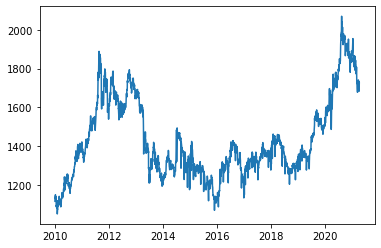

In [96]:
plt.plot(gold_price)

In [97]:
len(gold_price)

2928

In [98]:
import pandas as pd

In [105]:
pd.Series(gold_price).ewm(span=5).mean()

2010-01-04    1117.700000
2010-01-05    1117.940000
2010-01-06    1126.447368
2010-01-07    1129.210769
2010-01-08    1132.661611
                 ...     
2021-03-26    1730.513939
2021-03-29    1724.409292
2021-03-30    1710.906195
2021-03-31    1711.870797
2021-04-01    1716.747198
Name: Gold_Price, Length: 2928, dtype: float64

In [106]:
import pickle

In [115]:
hi = pickle.load(open("n_compoents", 'rb'))

In [116]:
hi

{1: [46.453335790158214,
  12.427668714509878,
  6.327043339355487,
  11.361413047459768,
  19.39500668376568,
  6.322235263586731,
  9.879528736999191,
  33.88616178099905],
 2: [41.31209778709624,
  11.542237690249385,
  6.409151445065549,
  11.363573383031554,
  19.59036345300433,
  6.142286470538556,
  9.970905947571532,
  33.96094669743934],
 3: [34.00856738706416,
  6.968363317074113,
  6.583234475636004,
  8.261510641906398,
  19.104371812217757,
  8.120489369990583,
  5.310515426103848,
  27.617142971848672],
 4: [35.795163836351115,
  8.949175835029678,
  5.285829756256954,
  5.132588958722863,
  12.491479418332142,
  6.843264409460471,
  4.504048927815847,
  25.957115548752018],
 5: [32.33464029638528,
  7.272576990843822,
  5.524940375229198,
  5.596483601184559,
  10.364405821831634,
  5.095567591507643,
  5.662996207037804,
  21.546142733822034],
 6: [28.481112170581106,
  6.209229749092856,
  6.691648115055796,
  6.086698006721053,
  9.456438513872081,
  4.63790607817848,

In [124]:
str(pd.date_range("2018-01-01","2020-03-03",freq="QS").tolist()[0]).split(" ")[0]

'2018-01-01'

In [125]:

dates_set = []

for date in pd.date_range("2015-01-01","2021-04-01",freq="QS").tolist() :
    dates_set.append(str(date).split(" ")[0])

In [126]:
dates_set

['2015-01-01',
 '2015-04-01',
 '2015-07-01',
 '2015-10-01',
 '2016-01-01',
 '2016-04-01',
 '2016-07-01',
 '2016-10-01',
 '2017-01-01',
 '2017-04-01',
 '2017-07-01',
 '2017-10-01',
 '2018-01-01',
 '2018-04-01',
 '2018-07-01',
 '2018-10-01',
 '2019-01-01',
 '2019-04-01',
 '2019-07-01',
 '2019-10-01',
 '2020-01-01',
 '2020-04-01',
 '2020-07-01',
 '2020-10-01',
 '2021-01-01',
 '2021-04-01']